# Myopia Clusters


## Background

You are on the data science team of a medical research company that’s interested in finding better ways to predict myopia, or nearsightedness. Your team has tried—and failed—to improve their classification model when training on the whole dataset. However, they believe that there might be distinct groups of patients that would be better to analyze separately. So, your supervisor has asked you to explore this possibility by using unsupervised learning.
You have been provided with raw data, so you’ll first need to process it to fit the machine learning models. You will use several clustering algorithms to explore whether the patients can be placed into distinct groups. Then, you’ll create a visualization to share your findings with your team and other key stakeholders.

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

Load the data into a Pandas DataFrame, name it as `df_myopia_data` and fetch the top 10 rows.

In [2]:
# Data loading
file_path = Path("myopia.csv")
df_myopia_data = pd.read_csv(file_path)
df_myopia_data.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


List the DataFrame's data types to ensure they're aligned to the type of data stored on each column.

In [3]:
# List dataframe data types
df_myopia_data.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

**Question 1:** Is there any column whose data type need to be changed? If so, make the corresponding adjustments.

**Answer:** All columns have an appropriate data type.

**Question 2:** Is there any unnecessary column that needs to be dropped? If so, make the corresponding adjustments.

**Answer:** All columns appear to be denote relevant characteristic of patient data.

In [4]:
df_myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
labels = df_myopia_data['MYOPIC']

Remove all rows with `null` values if any.

In [6]:
# Are there any columns/rows with null values? Find null values
for column in df_myopia_data.columns:
    print(f"Column {column} has {df_myopia_data[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


Remove duplicate entries if any.

In [7]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia_data.duplicated().sum()}")


Duplicate entries: 0


In [8]:
#Myopic column appears to have categorical data weather a patient has myopia or not. To confirm
df_myopia_data["MYOPIC"].unique()

array([1, 0])

Categorical data in the MYOPIC column column is needed for supervised machine learning, but it will make an unsupervised model biased. Therefore it needs to be removed from the dataframe

In order to use unsupervised learning algorithms, all the features should be numeric, and also, on similar scales. Perform the following data transformations.

* The `MYOPIC` column contains categorical data, anytime you have categorical variables, you should transform them to a numerical value, in this case all data categorical data is numerical, therefore there is no need for transformation

In [9]:
#Creating a new dataframe called df_myopia by dropping the MYOPIC column df_myopia_data
df_myopia = df_myopia_data.drop("MYOPIC", axis=1)
df_myopia.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


*  columns that contain larger values can influence the outcome more than columns with smaller values. To avoid this all columns are standardised using the StandardScaler module


In [10]:
# Scaling the data with the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [11]:
# A list of the columns from the original DataFrame
df_myopia.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [12]:
# Create a DataFrame with the transformed data
new_df_myopia = pd.DataFrame(scaled_data, columns=df_myopia.columns[0:])

new_df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


Save the cleaned DataFrame as a `CSV` file, name it as `myopia_cleaned_data.csv`.

 ## Part 2: Apply Dimensionality Reduction 

In [13]:
# Perform dimensionality reduction with PCA  that preserve 90% of the explained variance 
# in dimensionality reduction.

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(new_df_myopia)

# Get the explained variance ratio
pca.explained_variance_ratio_.sum()


0.9187361702915187

In [14]:
# Run t-SNE
tsne = TSNE(learning_rate=250) #n_components=3, n_iter=2500, #perplexity=50 )
tsne_features = tsne.fit_transform(myopia_pca)

In [15]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

In [16]:
tsne_features

array([[ 13.991474  ,   5.2044725 ],
       [  0.6882363 ,  16.065025  ],
       [ -0.97412014, -19.210573  ],
       ...,
       [ -1.1072392 ,  17.371483  ],
       [-10.25571   , -20.540419  ],
       [ -4.4644814 ,  12.813213  ]], dtype=float32)

In [17]:
 #changing tsne_features object into a dataframe
tsne_features_df = pd.DataFrame(tsne_features)
tsne_features_df.head()

,0,1
0,13.991474,5.204473
1,0.688236,16.065025
2,-0.974120,-19.210573
3,11.985346,19.779604
4,12.363314,-12.794661


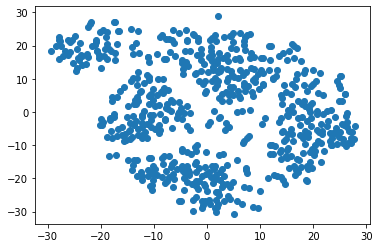

In [18]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

As can be seen from the plot above there are distinct clusters in the data, that can be labeled

## Part 3: Perform a Cluster Analysis with K-means

In [19]:
#Identify the best number of clusters using the elbow curve
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


,k,inertia
0,1,255289.281250
1,2,141777.296875
2,3,87360.343750
3,4,60307.722656
4,5,41322.371094


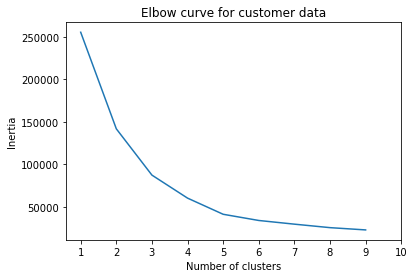

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

From the elbow plot above the ideal number of cluster of this dataset appears to be 5. Because biggest change in the slope of the curve occurs at this point

In [21]:
#Create a function called get_clusters(k, data) that finds the k clusters using K-Means on data. 
#The function should return a DataFrame copy of Data that should include a new column containing the clusters found.

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

Analyzing Clusters with the Best Value of k

In [22]:
clusters = get_clusters(5,tsne_features_df)

In [23]:
clusters.head()

,0,1,class
0,13.991474,5.204473,3
1,0.688236,16.065025,3
2,-0.974120,-19.210573,0
3,11.985346,19.779604,3
4,12.363314,-12.794661,2


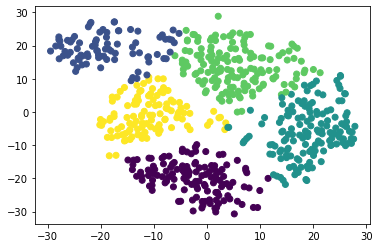

In [24]:
plt.scatter(x=clusters[0], y=clusters[1], c=clusters["class"])
plt.show()

## Part 4: Make a Recommendation

With the elbow curve it was possible to determine that the optimum number of clusters for this dataset is five. Further analysis of these clusters needs to be made to determine if there are any patterns in each cluster locally. For example initially the MYOPIC column which had the classification data about weather the patient had MYOPIA or not was removed from the data that was analysed to avoid any bias. It would be interesting to apply the real classification labels from the MYOPIC column to the data points in each cluster to see  if patients that have MYOPIA segregent into a particulor cluster or not . This would be a good way of validating the model